# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from collections import Counter
from textblob import Word
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("all")
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data.

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!


[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\SimsFan85\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst business class ex...
1,Not Verified | Quite possibly the worst busin...
2,Not Verified | I will never be flying with BA...
3,✅ Trip Verified | On the my trip to Mexico Ci...
4,✅ Trip Verified | I upgraded at check in to C...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df.reviews = df.reviews.str.split('|', expand = True)[1]
df

,reviews
0,The worst business class experience. Ground ...
1,Quite possibly the worst business class I ha...
2,I will never be flying with BA again. This i...
3,"On the my trip to Mexico City, I had the opp..."
4,I upgraded at check in to Club Europe seat 1...
...,...
995,Tenerife to Heathrow. Effectively a budget a...
996,"Heathrow to Larnaca - departed on time, fligh..."
997,Los Angeles to London. A very enjoyable and ...
998,"London to Phoenix, BA289 yesterday. The plan..."


In [7]:
# function to preprocess text
def preprocess_text(text):

    # Each word will have its own token

    tokens = word_tokenize(text.lower())




    # Eliminate stopwords

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Combine tokens into string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

#Source: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

In [8]:
df['cleaned reviews'] = df.reviews.apply(preprocess_text)
df

,reviews,cleaned reviews
0,The worst business class experience. Ground ...,worst business class experience . ground crew ...
1,Quite possibly the worst business class I ha...,quite possibly worst business class ever flown...
2,I will never be flying with BA again. This i...,never flying ba . first last . flying singapor...
3,"On the my trip to Mexico City, I had the opp...","trip mexico city , opportunity experience ba l..."
4,I upgraded at check in to Club Europe seat 1...,upgraded check club europe seat 1d excellent e...
...,...,...
995,Tenerife to Heathrow. Effectively a budget a...,tenerife heathrow . effectively budget airline...
996,"Heathrow to Larnaca - departed on time, fligh...","heathrow larnaca - departed time , flight near..."
997,Los Angeles to London. A very enjoyable and ...,los angeles london . enjoyable comfortable fli...
998,"London to Phoenix, BA289 yesterday. The plan...","london phoenix , ba289 yesterday . plane suppo..."


In [9]:
df['Polarity'] = df['cleaned reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df

,reviews,cleaned reviews,Polarity
0,The worst business class experience. Ground ...,worst business class experience . ground crew ...,-0.040385
1,Quite possibly the worst business class I ha...,quite possibly worst business class ever flown...,-0.015385
2,I will never be flying with BA again. This i...,never flying ba . first last . flying singapor...,0.136000
3,"On the my trip to Mexico City, I had the opp...","trip mexico city , opportunity experience ba l...",0.138053
4,I upgraded at check in to Club Europe seat 1...,upgraded check club europe seat 1d excellent e...,0.686538
...,...,...,...
995,Tenerife to Heathrow. Effectively a budget a...,tenerife heathrow . effectively budget airline...,0.066250
996,"Heathrow to Larnaca - departed on time, fligh...","heathrow larnaca - departed time , flight near...",0.051190
997,Los Angeles to London. A very enjoyable and ...,los angeles london . enjoyable comfortable fli...,0.324079
998,"London to Phoenix, BA289 yesterday. The plan...","london phoenix , ba289 yesterday . plane suppo...",0.090476


In [10]:
polarity_sent = []
for value in df['Polarity']:
    if value > 0:
        polarity_sent.append("Positive")
    elif value < 0:
        polarity_sent.append("Negative")
    else:
        polarity_sent.append("Neutral")
df["Polarity Sentiment"] = polarity_sent
df

,reviews,cleaned reviews,Polarity,Polarity Sentiment
0,The worst business class experience. Ground ...,worst business class experience . ground crew ...,-0.040385,Negative
1,Quite possibly the worst business class I ha...,quite possibly worst business class ever flown...,-0.015385,Negative
2,I will never be flying with BA again. This i...,never flying ba . first last . flying singapor...,0.136000,Positive
3,"On the my trip to Mexico City, I had the opp...","trip mexico city , opportunity experience ba l...",0.138053,Positive
4,I upgraded at check in to Club Europe seat 1...,upgraded check club europe seat 1d excellent e...,0.686538,Positive
...,...,...,...,...
995,Tenerife to Heathrow. Effectively a budget a...,tenerife heathrow . effectively budget airline...,0.066250,Positive
996,"Heathrow to Larnaca - departed on time, fligh...","heathrow larnaca - departed time , flight near...",0.051190,Positive
997,Los Angeles to London. A very enjoyable and ...,los angeles london . enjoyable comfortable fli...,0.324079,Positive
998,"London to Phoenix, BA289 yesterday. The plan...","london phoenix , ba289 yesterday . plane suppo...",0.090476,Positive


In [11]:
sent_count = df["Polarity Sentiment"].value_counts()
sent_count

Positive    640
Negative    346
Neutral      14
Name: Polarity Sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

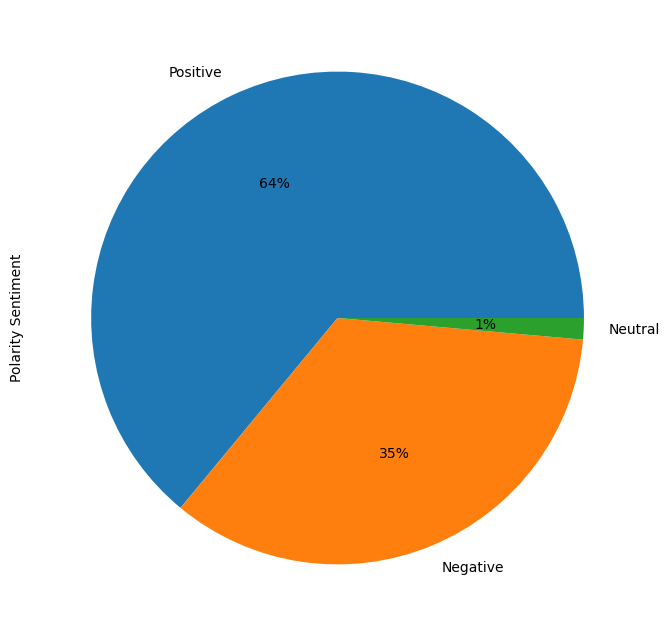

In [16]:
sent_count.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')
plt.show

Text(0.5, 1.0, 'Common Words in Reviews')

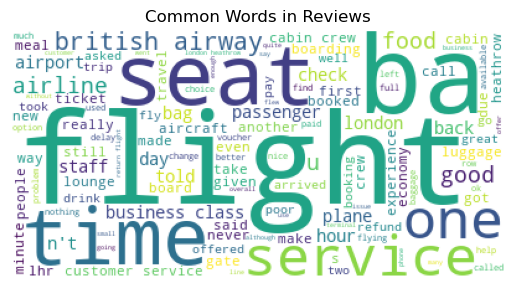

In [17]:
text = " ".join(i for i in df['cleaned reviews'])
common_words = WordCloud(stopwords=STOPWORDS, background_color = 'white').generate(text)
plt.axis("off")
plt.imshow(common_words)
plt.title("Common Words in Reviews")

In [18]:
df.to_csv("data/BA_reviews_cleaned.csv")